# Understanding Damped Harmonic Oscillators

## Introduction

In the realm of physics, oscillations are ubiquitous, manifesting in various natural phenomena, from the gentle swaying of a pendulum to the vibrations of strings in musical instruments. Among these oscillatory systems, the **damped harmonic oscillator** stands as an intriguing and fundamental subject.

### The Damped Harmonic Oscillator Equation

At its core, the damped harmonic oscillator is governed by a second-order differential equation, typically expressed as:

$$ m \frac{d^2x}{dt^2} + \gamma \frac{dx}{dt} + kx = 0 $$

In this equation:
- \(m\): Represents the **mass** of the oscillator. It affects how the oscillator responds to forces; greater mass results in slower motion.


- \($\gamma$\): Signifies the **damping coefficient**. It represents resistance to motion, such as friction or air resistance. Higher damping leads to quicker dissipation of energy and faster damping.


- \(k\): Stands for the **spring constant**, indicating the stiffness of the spring. A higher spring constant means a stiffer spring, resulting in a stronger force restoring the oscillator to equilibrium.


- \(x\): Represents the displacement from the equilibrium position. This value varies with time and indicates the oscillation of the system.


- \(t\): Represents time.


These parameters have physical significance and units, and they collectively define the behavior of the damped harmonic oscillator, i.e. conspire to influence the **displacement** (x) of the oscillator from its equilibrium position over time (t).


### Unveiling the Physics

- The **mass (m)** of the oscillator dictates its resistance to changes in velocity. A greater mass implies more substantial inertia, resulting in slower responses to applied forces.


- The **damping coefficient ($\gamma$)** embodies the system's capacity to dissipate energy through mechanisms like friction or air resistance. Enhanced damping leads to swifter energy dissipation and quicker damping.


- The **spring constant (k)** defines the stiffness of the system. A higher spring constant begets a more rigid spring, which, in turn, yields a stronger restoring force pulling the oscillator back to its equilibrium position.

## Exploring Further

To delve deeper into the fascinating world of damped harmonic oscillators and their applications, you can refer to the following bibliography:

- [**"Introduction to Mechanics"** by David J. Griffiths](https://www.amazon.com.be/-/en/David-J-Griffiths/dp/1107179866?language=en_GB): A comprehensive textbook covering the fundamental principles of mechanics, including damped oscillations.

- [**"Vibrations and Waves"** by A.P. French](https://www.amazon.com/Vibrations-Waves-P-French/dp/8123909144): An excellent resource on oscillatory motion, wave phenomena, and their practical significance.

In this Jupyter Notebook, we will embark on a journey to simulate and visualize the behavior of damped harmonic oscillators, providing you with hands-on experience in exploring these intriguing physical systems.

---

In the first cell of your notebook, import the necessary Python libraries, such as ``NumPy`` for numerical operations and ``Matplotlib`` for plotting. You may also want to enable interactive plotting using ``%matplotlib notebook``

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Enable interactive plotting (optional)
%matplotlib notebook
%matplotlib inline

Next we will create a class to represent a physical object, e.g. a ball, that will oscillate. This object will be characterized by four physical properties: 

- its mass, 

- its position relative to the equilibrium (rest) position,

- its velocity, and 

- its acceleration.

We will also define a function that prints a number of space characters for convenience.

In [2]:
class Ball():
    """
    A class that defines a Ball object with four properties:
        1. mass
        2. position
        3. velocity
        4. acceleration
    """
    def __init__(self, mass: float, position: float, velocity: float, acceleration: float) -> None:
        self.mass = mass
        self.position = position
        self.velocity = velocity
        self.acceleration = acceleration

In [3]:
def print_blanks(num: int) -> None:
    """
        A simple function that prints
        a user specified number of
        space characters (num + 39)
    """
    for i in range(int(num + 39)):
        print(" ", end="")
    return None

Now we will define a new function that implements the Euler method in order to numerically solve the damped harmonic oscillator equation. 

We initalize our harmonic oscillator by displacing and fixing the ball in a specific location. Then, in each timestep, we re-calculate the position, velocity, and acceleration of the ball, based on the previously calculated values. We continue to do so until the position, or the velocity, of the ball drop below a threshold value, in which case we consider the oscillator to be fully damped.

For a more straightforward implementation of the Euler method check the Appendix A1.

In [4]:
def print_pendulum() -> None:
    
    """
        The function helps visualise the motion of
        a damped harmonic oscillator.
    """
    
    # Define some useful constants/quantities
    spring_constant: float = 1. # Hooke's law: F = -kx
    damping_coeff: float = 0.1 # set to > 0 for damped harmonic oscillator
    time_step: float = 0.1
        
    # Instantiate a Ball object with
    # mass          : 0.1 [arb. unit]
    # position      : -40 [arb.unit]
    # velocity      : 0.0 [arb. unit]
    # acceleration  : 0.0 [arb. unit]
    ball = Ball(mass=0.1, position=-40., velocity=0., acceleration=0.)

    # Run as long the displacement (or velocity) are "significant"
    # Larger values will terminate the simulation earlier
    # Smaller values will terminate the simulation later on
    while (abs(ball.position) > 1.0) or (abs(ball.velocity) > 1.0):
        
        # damping force is linearly dependent upon the velocity
        damping_force: float = -ball.velocity * damping_coeff 
            
            
            
        # the damping force term is to create a damped oscillator
        # the oscillation will be subjected to exponential decay 
        # which depends upon the damping coefficient
        spring_force: float = -spring_constant * ball.position + damping_force  
                                                                                

        ball.acceleration = spring_force / ball.mass    # a = F / m
        ball.velocity += ball.acceleration * time_step  # u = a * t
        ball.position += ball.velocity * time_step      # x = u * t

        print_blanks(ball.position)
        print("o")
        time.sleep(50_000 / 1_000_000.0)

    return None

In [5]:
print_pendulum()

   o
          o
                   o
                             o
                                        o
                                                 o
                                                        o
                                                             o
                                                               o
                                                              o
                                                           o
                                                      o
                                                 o
                                          o
                                    o
                               o
                           o
                         o
                        o
                         o
                           o
                              o
                                 o
                                     o
                                         o
                  

Now that we know our numerical solver works fine, we want to study the effect of various damping coefficients on the motion of the oscillator.

We will consider three (underdamping) coefficients, namely 0.01, 0.05, and 0.1. We will apply the same method as before for each one of them and store their displacement evolution in a list. In order to do so, we will engulf the whole algorithm implemented in the ``print_pendulum()`` function (with small modifications) within a ``for-loop`` that will iterate over the three values of the damping coefficient.

In [6]:
# Store all positions in a list
# Initialize them to a specific position
displacement_zeta0p01, displacement_zeta0p05, displacement_zeta0p1  = [40], [40], [40]
idx1, idx2, idx3 = 0,0,0

# "declare" some useful variables
spring_constant: float = 1.
time_step: float = 0.1

for damping_coeff in [0.01, 0.05, 0.1]:
    
    # Instantiate a Ball object for every damping coefficient
    ball = Ball(mass = 0.1, position = 40., velocity = 0., acceleration = 0.)
    while (abs(ball.position) > 1.0) or (abs(ball.velocity) > 1.0):

        damping_force: float = -ball.velocity * damping_coeff 
        spring_force: float = -spring_constant * ball.position + damping_force  


        ball.acceleration = spring_force / ball.mass    # a = F / m
        ball.velocity += ball.acceleration * time_step  # u = at
        ball.position += ball.velocity * time_step      # x = ut

        if damping_coeff == 0.01:
            idx1 += 1
            displacement_zeta0p01.append(displacement_zeta0p01[idx1-1] + ball.position)
        elif damping_coeff == 0.05:
            idx2 += 1
            displacement_zeta0p05.append(displacement_zeta0p05[idx2-1] + ball.position)
        else:
            idx3 += 1
            displacement_zeta0p1.append(displacement_zeta0p1[idx3-1] + ball.position)

Next, we will create a time array for each of the different damping coefficients with the same length as the corresponding displacement list. This is basically a fake time interval spanning over the whole evolution.

We could also have created three different lists/arrays, along with the displacement lists, that would have stored the current time in each timestep. 

Whatever way you choose to get the time data, you are now in position to make a plot of the displacements and see how they evolve over time.

In [7]:
total_time_zeta0p01 = np.linspace(0, 50, len(displacement_zeta0p01))
total_time_zeta0p05 = np.linspace(0, 50, len(displacement_zeta0p05))
total_time_zeta0p1 = np.linspace(0, 50, len(displacement_zeta0p1))

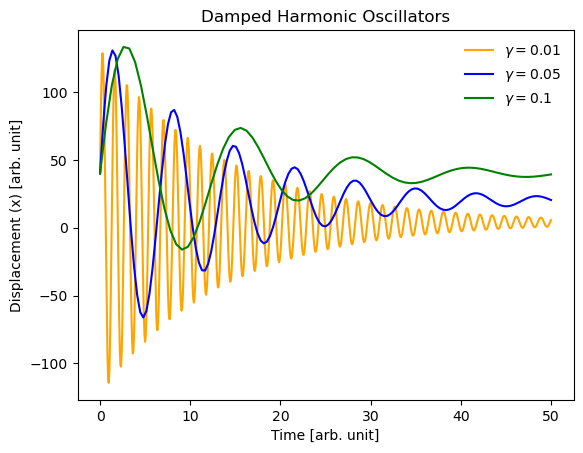

In [8]:
plt.xlabel("Time [arb. unit]")
plt.ylabel("Displacement (x) [arb. unit]")
plt.title('Damped Harmonic Oscillators')

plt.plot(total_time_zeta0p01, displacement_zeta0p01, color="orange", label = r"$\gamma = 0.01$")
plt.plot(total_time_zeta0p05, displacement_zeta0p05, color="blue", label = r"$\gamma = 0.05$")
plt.plot(total_time_zeta0p1, displacement_zeta0p1, color="green", label = r"$\gamma = 0.1$")

# Uncomment this if you want to add a grid to your plot
# plt.grid(True)

plt.legend(loc="upper right", frameon = False)
plt.show()

Now that we've simulated the damped harmonic oscillator and visualized the results, let's interpret what we see in the graph:

**Interpreting the Graph**: The graph shows the displacement (x) of the oscillator as a function of time (t). It illustrates how the oscillator's position changes over time, displaying oscillatory behavior that gradually diminishes due to damping.


**Effects of Parameters**: Changing the parameters (mass, damping coefficient, and spring constant) has notable effects on the motion:

   - Increasing mass results in slower oscillations (not showed here; you can test it by yourself).
   
   - Larger damping coefficients leads to faster damping, causing quicker decay.
   
   - A larger spring constant makes the oscillator oscillate more rapidly (not showed here; you can test it by yourself).
   
 

### Homework


1. **Resonance**: Resonance occurs when the driving frequency matches the natural frequency of the system (typically when damping is low). Can you explain how varying the damping coefficient affects resonance?


2. **Energy Dissipation**: Discuss how damping causes energy dissipation, ultimately bringing the oscillator to rest. Introduce the concept of critical damping, where the oscillator returns to equilibrium as quickly as possible without oscillating.


3. **Applications**: Discuss real-world applications of damped harmonic oscillators, such as shock absorbers in vehicles, vibrating systems, and electrical circuits.

---

# Appendix

## A1. Simulating a damped harmonic oscillator using the Euler method

**Step 1: Define the Damped Harmonic Oscillator Equations**

$$ m \frac{d^2x}{dt^2} + c \frac{dx}{dt} + kx = 0 $$

**Step 2: Discretize the Equations**

Discretize the equations to simulate the motion of the oscillator numerically. You can use the Euler method or a more sophisticated numerical solver like the Runge-Kutta method (presented in A2).

Here's an example of using the Euler method:

In [9]:
def damped_harmonic_oscillator_euler(x0, v0, m, c, k, dt, num_steps):
    x = np.zeros(num_steps)
    v = np.zeros(num_steps)

    x[0] = x0
    v[0] = v0

    for i in range(1, num_steps):
        acceleration = (-c * v[i-1] - k * x[i-1]) / m
        v[i] = v[i-1] + acceleration * dt
        x[i] = x[i-1] + v[i] * dt

    return x, v

In [10]:
# Define parameters
m = 1.0  # Mass
c = 0.5  # Damping coefficient
k = 1.0  # Spring constant
x0 = 1.0  # Initial displacement
v0 = 0.0  # Initial velocity
dt = 0.01  # Time step
num_steps = 1000  # Number of time steps

In [11]:
# Simulate the damped harmonic oscillator
x, v = damped_harmonic_oscillator_euler(x0, v0, m, c, k, dt, num_steps)

# Create a time array
t = np.arange(0, num_steps * dt, dt)

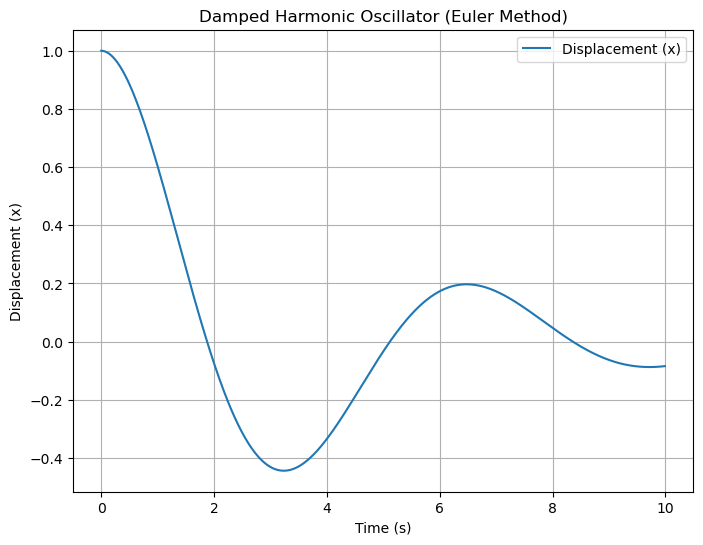

In [12]:
# Plot the displacement vs. time
plt.figure(figsize=(8, 6))

plt.plot(t, x, label='Displacement (x)')

plt.xlabel('Time (s)')
plt.ylabel('Displacement (x)')
plt.title('Damped Harmonic Oscillator (Euler Method)')


plt.legend()
plt.grid(True)
plt.show()

## A2. Simulating a damped harmonic oscillator using the Runge-Kutta method

The Runge-Kutta method is a numerical technique for solving ordinary differential equations (ODEs). We can use it to simulate a damped harmonic oscillator. 

Here's a Python code example using the Runge-Kutta method to simulate the motion of a damped harmonic oscillator:

In [13]:
# Define the damped harmonic oscillator equation
def damped_harmonic_oscillator(x, v, m, c, k, t):
    dxdt = v
    dvdt = (-c * v - k * x) / m
    return dxdt, dvdt

# Runge-Kutta 4th Order integration method
def runge_kutta4(x, v, m, c, k, t, dt):
    k1x, k1v = damped_harmonic_oscillator(x, v, m, c, k, t)
    k2x, k2v = damped_harmonic_oscillator(x + 0.5 * k1x * dt, v + 0.5 * k1v * dt, m, c, k, t + 0.5 * dt)
    k3x, k3v = damped_harmonic_oscillator(x + 0.5 * k2x * dt, v + 0.5 * k2v * dt, m, c, k, t + 0.5 * dt)
    k4x, k4v = damped_harmonic_oscillator(x + k3x * dt, v + k3v * dt, m, c, k, t + dt)

    x_new = x + (dt / 6.0) * (k1x + 2 * k2x + 2 * k3x + k4x)
    v_new = v + (dt / 6.0) * (k1v + 2 * k2v + 2 * k3v + k4v)

    return x_new, v_new

In [14]:
# Initial conditions
m = 1.0  # Mass
c = 0.2  # Damping coefficient
k = 1.0  # Spring constant
x0 = 1.0  # Initial displacement
v0 = 0.0  # Initial velocity
dt = 0.01  # Time step
num_steps = 1000  # Number of time steps

In [15]:
# Create arrays to store results
x_values = np.zeros(num_steps)
v_values = np.zeros(num_steps)
t_values = np.zeros(num_steps)

# Initialize initial conditions
x_values[0] = x0
v_values[0] = v0

In [16]:
# Perform the Runge-Kutta integration
for i in range(1, num_steps):
    t_values[i] = i * dt
    x_values[i], v_values[i] = runge_kutta4(x_values[i-1], v_values[i-1], m, c, k, t_values[i-1], dt)

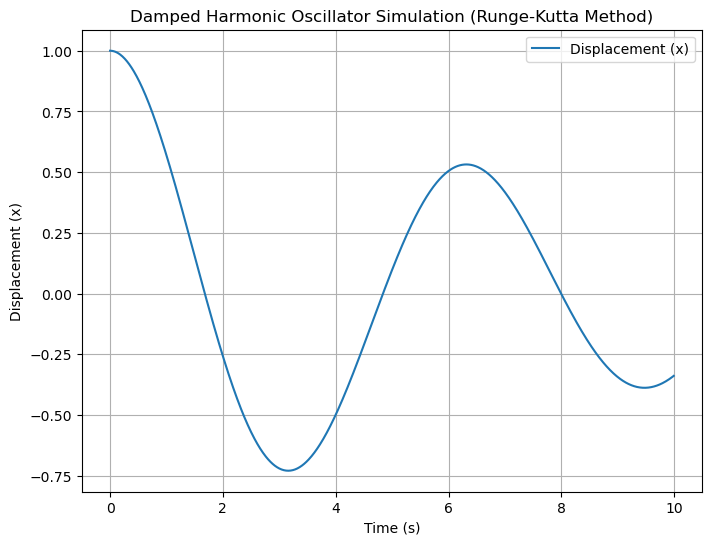

In [17]:
# Plot the results
plt.figure(figsize=(8, 6))

plt.plot(t_values, x_values, label='Displacement (x)')


plt.xlabel('Time (s)')
plt.ylabel('Displacement (x)')
plt.title('Damped Harmonic Oscillator Simulation (Runge-Kutta Method)')


plt.legend()
plt.grid(True)
plt.show()


This code defines the damped harmonic oscillator equation, implements the Runge-Kutta 4th Order integration method, and then simulates and visualizes the motion of the oscillator. You can adjust the initial conditions (`m`, `c`, `k`, `x0`, `v0`), time step (`dt`), and number of time steps (`num_steps`) to explore different scenarios.